# Bayesian Estimation with a Possibly Faulty Sensor: When MAP ≠ MMSE

## Learning goals

After working through this notebook, you should be able to:

1. Describe a realistic engineering scenario where a sensor can be **healthy** or **faulty**.
2. Model prior uncertainty about the true temperature as a **mixture of two Gaussian distributions**.
3. Derive and interpret the **posterior distribution** as a mixture of Gaussians.
4. Compute and compare the **MAP (Maximum A Posteriori)** and **MMSE (Minimum Mean Square Error)** estimators.
5. Understand visually and conceptually **why MAP and MMSE are different** when the posterior is **multimodal**.


## 1. Engineering context: a sensor that may be faulty

Consider a temperature sensor installed in an industrial process (for example, in a reactor or in an HVAC system):

- Most of the time, the sensor behaves correctly (it is **healthy**).
- Sometimes, due to calibration problems or aging, the sensor becomes **faulty**, and its readings are systematically shifted (biased).

We are interested in the **true temperature** $T$ at some location.

We take one measurement $y$ from the sensor, but we are not sure if the sensor is currently healthy or faulty.

From past experience, we know:

- When the sensor is **healthy**, the temperature is typically around $50 \, ^\circ C$ (for example, a normal operating point), with moderate variability.
- When the sensor is **faulty**, the readings tend to correspond to a different effective temperature, e.g. around $70 \, ^\circ C$.
- The healthy state is much more probable than the faulty state (e.g. 85% vs 15%).

This naturally leads to a **mixture prior** for $T$.


## 2. Probabilistic model

### 2.1. Prior for the true temperature

We model the true temperature $T$ as coming from one of two scenarios:

1. **Healthy sensor scenario** (index 1):
   - $T \sim \mathcal{N}(\mu_1, \sigma_1^2)$
   - Example: $\mu_1 = 50$, $\sigma_1 = 2$.

2. **Faulty sensor scenario** (index 2):
   - $T \sim \mathcal{N}(\mu_2, \sigma_2^2)$
   - Example: $\mu_2 = 70$, $\sigma_2 = 3$.

We also model our prior belief about which scenario is active:

- Prior probability of healthy sensor: $p = P(\text{healthy})$.
- Prior probability of faulty sensor: $1-p = P(\text{faulty})$.

Therefore the prior for $T$ is a **mixture of two Gaussians**:

$$
p(T) = p \, \mathcal{N}(T; \mu_1, \sigma_1^2) + (1-p) \, \mathcal{N}(T; \mu_2, \sigma_2^2).
$$

Visually, $p(T)$ will typically have **two bumps** (two modes), one near $\mu_1$ and another near $\mu_2$.


### 2.2. Measurement model

We take a measurement $y$ from the sensor. We assume that the measurement is affected by additive Gaussian noise:

$$
y = T + n, \qquad n \sim \mathcal{N}(0, \sigma_n^2).
$$

Conditioned on $T$, the measurement $y$ is Gaussian:

$$
p(y \mid T) = \mathcal{N}(y; T, \sigma_n^2).
$$

Typical situation: $\sigma_n$ is small (e.g. $1 \, ^\circ C$), meaning the sensor is relatively precise, but it may be systematically biased (faulty scenario).


## 3. Posterior distribution $p(T \mid y)$ as a mixture of Gaussians

By Bayes' theorem, the posterior distribution of the true temperature given the measurement is:

$$
p(T \mid y) = \frac{p(y \mid T) p(T)}{p(y)}.
$$

Using the mixture prior, we can write:

$$
p(T) = p \, \mathcal{N}(T; \mu_1, \sigma_1^2) + (1-p) \, \mathcal{N}(T; \mu_2, \sigma_2^2).
$$

Then:

$$
p(T \mid y) \propto p(y \mid T) \, p(T)
= p \, \mathcal{N}(y; T, \sigma_n^2) \mathcal{N}(T; \mu_1, \sigma_1^2)
+ (1-p) \, \mathcal{N}(y; T, \sigma_n^2) \mathcal{N}(T; \mu_2, \sigma_2^2).
$$

For each component $i \in \{1,2\}$, the product

$$
\mathcal{N}(y; T, \sigma_n^2) \mathcal{N}(T; \mu_i, \sigma_i^2)
$$

is (as a function of $T$) proportional to another Gaussian in $T$. Thus the posterior is a **mixture of two Gaussian posteriors**:

$$
p(T \mid y) = \alpha_1(y) \, \mathcal{N}(T; \mu_{1,\text{post}}(y), \sigma_{1,\text{post}}^2)
+ \alpha_2(y) \, \mathcal{N}(T; \mu_{2,\text{post}}(y), \sigma_{2,\text{post}}^2),
$$

where $\alpha_1(y)$ and $\alpha_2(y)$ are the **posterior mixing weights** (posterior probabilities of "healthy" and "faulty" scenarios), and $\mu_{i,\text{post}}(y)$, $\sigma_{i,\text{post}}^2$ are the posterior mean and variance for each scenario.


### 3.1. Posterior mixing weights

We define the unnormalized weights:

$$
w_i(y) = p_i \, p(y \mid \text{scenario } i)
= p_i \, \mathcal{N}(y; \mu_i, \sigma_i^2 + \sigma_n^2),
$$

where $p_1 = p$ and $p_2 = 1-p$.

Then the normalized posterior weights are:

$$
\alpha_i(y) = \frac{w_i(y)}{w_1(y) + w_2(y)}.
$$

Interpretation:
- $\alpha_1(y)$ is the **posterior probability** that the sensor is healthy given the measurement $y$.
- $\alpha_2(y)$ is the **posterior probability** that the sensor is faulty given the measurement $y$.


### 3.2. Posterior mean and variance for each component

For each scenario $i$, combining a Gaussian prior $\mathcal{N}(\mu_i, \sigma_i^2)$ with the Gaussian likelihood $\mathcal{N}(y; T, \sigma_n^2)$ leads to a Gaussian posterior:

$$
\sigma_{i,\text{post}}^2 = \left( \frac{1}{\sigma_i^2} + \frac{1}{\sigma_n^2} \right)^{-1},
$$

$$
\mu_{i,\text{post}}(y) = \sigma_{i,\text{post}}^2 \left( \frac{\mu_i}{\sigma_i^2} + \frac{y}{\sigma_n^2} \right).
$$

Thus the full posterior is a mixture of two Gaussians, **typically bimodal** (two peaks). This bimodality is the key reason why **MAP and MMSE will differ**.


## 4. MAP and MMSE estimators

In Bayesian estimation, given the posterior $p(T \mid y)$, we can construct different estimators.

### 4.1. MAP estimator

The **Maximum A Posteriori (MAP)** estimator chooses the value of $T$ that maximizes the posterior density:

$$
\hat{T}_{MAP}(y) = \arg\max_T \, p(T \mid y).
$$

In our mixture case, the posterior is a sum of two Gaussians. The global maximum will be located at the peak of **one of the two components** (not necessarily the closest to $y$, but the one with higher posterior density).

Effectively, MAP behaves like a **winner-takes-all decision** between the two scenarios (healthy vs faulty).

### 4.2. MMSE estimator

The **Minimum Mean Square Error (MMSE)** estimator under squared loss is the **posterior mean**:

$$
\hat{T}_{MMSE}(y) = \mathbb{E}[T \mid y]
= \int T \, p(T \mid y) \, dT.
$$

In our mixture case, this becomes:

$$
\hat{T}_{MMSE}(y) = \alpha_1(y) \, \mu_{1,\text{post}}(y) + \alpha_2(y) \, \mu_{2,\text{post}}(y),
$$

which is a **weighted average** of the component posterior means.

Because the posterior is bimodal, the posterior mean can lie **between the two modes**, in a region where the posterior density might be relatively low. This is a fundamental reason why **MAP and MMSE are different** in multimodal settings.


In [1]:
# 5. Imports and basic setup

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import animation
from IPython.display import HTML

plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["font.size"] = 11


In [2]:
# 6. Define prior and noise parameters

# Prior mixture weights
p_healthy = 0.85  # P(healthy sensor)
p_faulty = 1 - p_healthy

# Healthy sensor scenario (index 1)
mu1 = 50.0   # degrees Celsius
sigma1 = 2.0

# Faulty sensor scenario (index 2)
mu2 = 70.0   # degrees Celsius
sigma2 = 3.0

# Measurement noise standard deviation
sigma_n = 1.0

print("Prior mixture:")
print(f"  Healthy scenario:  mu1 = {mu1}, sigma1 = {sigma1}, prior prob = {p_healthy}")
print(f"  Faulty scenario:   mu2 = {mu2}, sigma2 = {sigma2}, prior prob = {p_faulty}")
print(f"Measurement noise: sigma_n = {sigma_n}")


Prior mixture:
  Healthy scenario:  mu1 = 50.0, sigma1 = 2.0, prior prob = 0.85
  Faulty scenario:   mu2 = 70.0, sigma2 = 3.0, prior prob = 0.15000000000000002
Measurement noise: sigma_n = 1.0


## 7. Visualizing the prior mixture distribution

We first plot the prior distribution $p(T)$ to see the two modes (healthy and faulty scenarios).

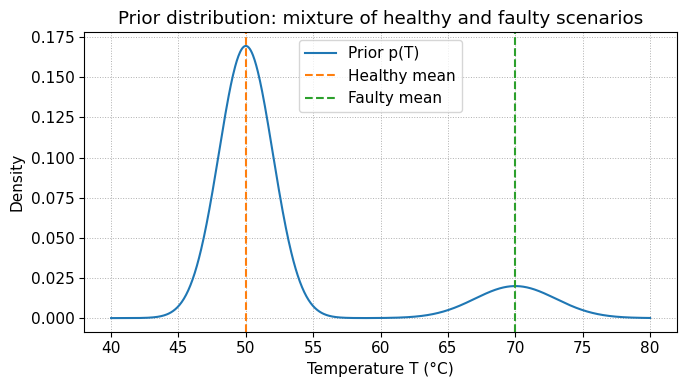

In [3]:
T_grid = np.linspace(40, 80, 1000)

prior_pdf = p_healthy * norm.pdf(T_grid, mu1, sigma1) \
          + p_faulty * norm.pdf(T_grid, mu2, sigma2)

plt.figure()
plt.plot(T_grid, prior_pdf, label="Prior p(T)")
plt.axvline(mu1, color="C1", linestyle="--", label="Healthy mean")
plt.axvline(mu2, color="C2", linestyle="--", label="Faulty mean")
plt.xlabel("Temperature T (°C)")
plt.ylabel("Density")
plt.title("Prior distribution: mixture of healthy and faulty scenarios")
plt.grid(True, linestyle=":", linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


## 8. Posterior for a specific measurement

Let us consider a specific measurement:

$$
y = 60 \, ^\circ C.
$$

This value is **between** the typical healthy temperature ($50$) and the typical faulty temperature ($70$). Therefore, it is not obvious which scenario is more plausible. This is exactly the kind of situation where the posterior becomes **strongly bimodal** and MAP and MMSE will differ significantly.


In [4]:
y_example = 60.0
print(f"Example measurement: y = {y_example} °C")


Example measurement: y = 60.0 °C


In [5]:
# 8.1. Functions to compute posterior quantities

def posterior_component_params(mu_i, sigma_i, y, sigma_n):
    """Return posterior mean and std for one Gaussian component (scenario i)."""
    var_post = 1.0 / (1.0 / sigma_i**2 + 1.0 / sigma_n**2)
    mu_post = var_post * (mu_i / sigma_i**2 + y / sigma_n**2)
    return mu_post, np.sqrt(var_post)

def posterior_mixture_weights(y, p_healthy, mu1, sigma1, mu2, sigma2, sigma_n):
    """Return posterior mixing weights alpha1, alpha2 given measurement y."""
    # p(y | scenario 1)
    py_1 = norm.pdf(y, loc=mu1, scale=np.sqrt(sigma1**2 + sigma_n**2))
    # p(y | scenario 2)
    py_2 = norm.pdf(y, loc=mu2, scale=np.sqrt(sigma2**2 + sigma_n**2))

    w1 = p_healthy * py_1
    w2 = p_faulty * py_2
    Z = w1 + w2
    alpha1 = w1 / Z
    alpha2 = w2 / Z
    return alpha1, alpha2

def posterior_pdf(T, y):
    """Full posterior pdf p(T | y) as mixture of two Gaussians."""
    mu1_post, s1_post = posterior_component_params(mu1, sigma1, y, sigma_n)
    mu2_post, s2_post = posterior_component_params(mu2, sigma2, y, sigma_n)
    alpha1, alpha2 = posterior_mixture_weights(y, p_healthy, mu1, sigma1, mu2, sigma2, sigma_n)
    return (alpha1 * norm.pdf(T, mu1_post, s1_post)
          + alpha2 * norm.pdf(T, mu2_post, s2_post)), mu1_post, s1_post, mu2_post, s2_post, alpha1, alpha2


In [6]:
# 8.2. Compute posterior, MAP and MMSE for the example measurement

post_pdf_example, mu1_post_ex, s1_post_ex, mu2_post_ex, s2_post_ex, a1_ex, a2_ex = posterior_pdf(T_grid, y_example)

# MMSE estimator (posterior mean)
MMSE_ex = a1_ex * mu1_post_ex + a2_ex * mu2_post_ex

# MAP estimator: find T that maximizes the posterior pdf
idx_map = np.argmax(post_pdf_example)
MAP_ex = T_grid[idx_map]

print("Posterior mixing weights for y =", y_example)
print(f"  alpha1 (healthy) = {a1_ex:.3f}")
print(f"  alpha2 (faulty)  = {a2_ex:.3f}")
print()
print("Posterior component means:")
print(f"  Healthy scenario: mu1_post = {mu1_post_ex:.2f} °C")
print(f"  Faulty scenario:  mu2_post = {mu2_post_ex:.2f} °C")
print()
print("Estimators:")
print(f"  MAP  estimate = {MAP_ex:.2f} °C")
print(f"  MMSE estimate = {MMSE_ex:.2f} °C")


Posterior mixing weights for y = 60.0
  alpha1 (healthy) = 0.051
  alpha2 (faulty)  = 0.949

Posterior component means:
  Healthy scenario: mu1_post = 58.00 °C
  Faulty scenario:  mu2_post = 61.00 °C

Estimators:
  MAP  estimate = 60.98 °C
  MMSE estimate = 60.85 °C


### 8.3. Visualizing the posterior for the example

We now plot the full posterior distribution $p(T \mid y)$ for $y = 60$ and indicate:

- The two **posterior component means** (healthy and faulty).
- The **MAP** estimator (location of the global maximum).
- The **MMSE** estimator (posterior mean).


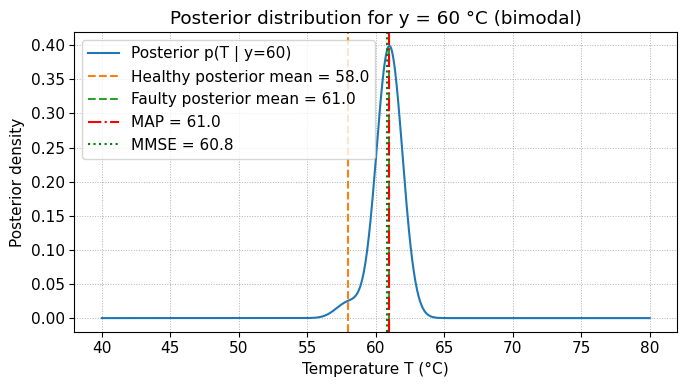

In [7]:
plt.figure()
plt.plot(T_grid, post_pdf_example, label="Posterior p(T | y=60)")

# Mark posterior component means
plt.axvline(mu1_post_ex, color="C1", linestyle="--", label=f"Healthy posterior mean = {mu1_post_ex:.1f}")
plt.axvline(mu2_post_ex, color="C2", linestyle="--", label=f"Faulty posterior mean = {mu2_post_ex:.1f}")

# Mark MAP and MMSE
plt.axvline(MAP_ex,  color="red",   linestyle="-.", label=f"MAP = {MAP_ex:.1f}")
plt.axvline(MMSE_ex, color="green", linestyle=":",  label=f"MMSE = {MMSE_ex:.1f}")

plt.xlabel("Temperature T (°C)")
plt.ylabel("Posterior density")
plt.title("Posterior distribution for y = 60 °C (bimodal)")
plt.grid(True, linestyle=":", linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


**Observation:**

- The posterior has two peaks: one near the healthy posterior mean and one near the faulty posterior mean.
- The **MAP** estimator chooses one of these peaks (the highest one).
- The **MMSE** estimator lies between the two peaks, because it is an average over the whole posterior.

This is a clear case where **MAP ≠ MMSE** and the difference has a concrete physical interpretation:

- MAP behaves like choosing **"healthy"** or **"faulty"**.
- MMSE behaves like a **compromise temperature** between both hypotheses.


## 9. How the posterior changes with the measurement

To build more intuition, we now explore how the posterior $p(T \mid y)$ changes as the measurement $y$ varies from $48$ to $72$.

- For $y$ near $50$, the healthy scenario dominates and the posterior is nearly unimodal near $50$.
- For $y$ near $70$, the faulty scenario dominates and the posterior is nearly unimodal near $70$.
- For intermediate $y$ (e.g. around $60$), both scenarios are plausible and the posterior is strongly bimodal.

We will visualize this using an animation.


In [8]:
# 9.1. Prepare a range of y values

y_values = np.linspace(48, 72, 80)  # 80 frames from 48 to 72

# Preallocate for speed (optional)
posters = []
post_params = []
for y_val in y_values:
    post_pdf_y, mu1_p, s1_p, mu2_p, s2_p, a1, a2 = posterior_pdf(T_grid, y_val)
    posters.append(post_pdf_y)
    post_params.append((mu1_p, mu2_p, a1, a2))


In [11]:
# 9.2. Create animation of the posterior as y varies

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
map_line = ax.axvline(0, color="red", linestyle="-.", label="MAP")
mmse_line = ax.axvline(0, color="green", linestyle=":", label="MMSE")

ax.set_xlim(40, 80)
ax.set_ylim(0, 0.5)
ax.set_xlabel("Temperature T (°C)")
ax.set_ylabel("Posterior density")
title = ax.set_title("")
ax.grid(True, linestyle=":", linewidth=0.7)
ax.legend(loc="upper right")

def init():
    line.set_data([], [])
    map_line.set_xdata([0, 0])
    mmse_line.set_xdata([0, 0])
    title.set_text("")
    return line, map_line, mmse_line, title

def animate(i):
    y_val = y_values[i]
    post_pdf_y = posters[i]
    mu1_p, mu2_p, a1, a2 = post_params[i]
    # Recompute MAP and MMSE for this y
    MMSE_y = a1 * mu1_p + a2 * mu2_p
    idx_map_y = np.argmax(post_pdf_y)
    MAP_y = T_grid[idx_map_y]

    line.set_data(T_grid, post_pdf_y)
    map_line.set_xdata([MAP_y, MAP_y])
    mmse_line.set_xdata([MMSE_y, MMSE_y])
    title.set_text(f"Posterior p(T | y={y_val:.1f})")
    return line, map_line, mmse_line, title

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(y_values), interval=150, blit=True)

plt.close(fig)  # Avoid double display in some environments
HTML(anim.to_jshtml())


**How to read the animation:**

- The horizontal axis is the true temperature $T$.
- The curve shows the posterior density $p(T \mid y)$.
- The red vertical line marks the **MAP** estimate.
- The green vertical line marks the **MMSE** estimate.

Watch how, for intermediate values of $y$, the posterior has two peaks and the MMSE lies between them, while the MAP jumps from one mode to the other.


## 10. MAP and MMSE as functions of the measurement

To further clarify the difference, we now plot the MAP and MMSE estimates as functions of the measurement $y$.

- On the horizontal axis: the measurement $y$.
- On the vertical axis: the corresponding estimate of $T$.

This will show that:

- **MAP** tends to be closer to either $\mu_1$ or $\mu_2$, with a sharp transition between them.
- **MMSE** is a smoother curve that transitions continuously between the two regimes.


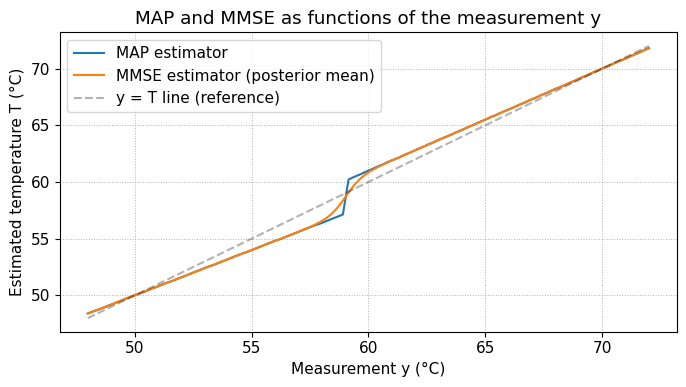

In [12]:
# 10.1. Compute MAP and MMSE for a grid of y values

y_grid = np.linspace(48, 72, 100)
MAP_vals = []
MMSE_vals = []

for y_val in y_grid:
    post_pdf_y, mu1_p, s1_p, mu2_p, s2_p, a1, a2 = posterior_pdf(T_grid, y_val)
    MMSE_y = a1 * mu1_p + a2 * mu2_p
    idx_map_y = np.argmax(post_pdf_y)
    MAP_y = T_grid[idx_map_y]
    MAP_vals.append(MAP_y)
    MMSE_vals.append(MMSE_y)

MAP_vals = np.array(MAP_vals)
MMSE_vals = np.array(MMSE_vals)

plt.figure()
plt.plot(y_grid, MAP_vals,  label="MAP estimator")
plt.plot(y_grid, MMSE_vals, label="MMSE estimator (posterior mean)")
plt.plot(y_grid, y_grid, "k--", alpha=0.3, label="y = T line (reference)")

plt.xlabel("Measurement y (°C)")
plt.ylabel("Estimated temperature T (°C)")
plt.title("MAP and MMSE as functions of the measurement y")
plt.grid(True, linestyle=":", linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


**Interpretation of the plot:**

- For low values of $y$ (near the healthy regime), both MAP and MMSE are close and near $50$.
- For high values of $y$ (near the faulty regime), both are close and near $70$.
- In the intermediate region, **MAP** switches relatively quickly from one branch (healthy) to the other (faulty).
- **MMSE** transitions smoothly between them, because it always averages over both scenarios according to their posterior probabilities.

This illustrates a key conceptual point:

- **MAP** behaves like a hard decision between competing hypotheses.
- **MMSE** behaves like a soft average over all hypotheses.


## 11. Summary and key takeaways

1. We modeled a realistic engineering problem: a temperature sensor that can be **healthy** or **faulty**, leading to a **mixture prior** for the true temperature $T$.

2. The measurement model $y = T + n$ with Gaussian noise leads to a **posterior distribution** $p(T \mid y)$ that is a **mixture of two Gaussians**, typically **bimodal**.

3. The **MAP estimator** $\hat{T}_{MAP}(y)$ chooses the value of $T$ where the posterior density is maximum. In this mixture setting, it effectively selects one of the two modes.

4. The **MMSE estimator** $\hat{T}_{MMSE}(y) = \mathbb{E}[T \mid y]$ is the posterior mean. It is a **weighted average** of the component posterior means and can lie between the modes.

5. When the posterior is strongly **multimodal**, as in the ambiguous region for $y$ between the typical healthy and faulty values, **MAP and MMSE are clearly different**:
   - MAP corresponds to a **hard hypothesis selection** ("healthy" vs "faulty").
   - MMSE corresponds to a **compromise** that averages over both possibilities.

6. For extreme values of $y$ (clearly healthy or clearly faulty), the posterior is nearly unimodal, and **MAP and MMSE become similar**.

In summary, this example shows that:

- **MAP = MMSE** only in special cases (for example, when the posterior is Gaussian and symmetric).
- In many realistic problems with **mixture models** and **multimodal posteriors**, **MAP and MMSE can lead to very different numerical estimates and different engineering interpretations**.
